In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install nbformat --upgrade
%pip install seaborn


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbformat as nbf
import plotly.express as px
import seaborn as sns

In [9]:
test_progVSreal_Str_2015_2024 = pd.read_csv("Data/SMARD/test_progVSreal_Str_2015_2024.csv")
combined_2015_2024 = pd.read_csv("Data/SMARD/combined_2015_2024.csv")

## 1 Realisierter Stromverbrauch und Gesamt realisierte Erzeugung


In [82]:
# BEGIN: Code modification
# Assuming that you are using plotly for plotting
import plotly.graph_objects as go

# Calculate the percentage
combined_2015_2024['Realisierte Erzeugung Percentage'] = combined_2015_2024['Realisierte Erzeugung'] / combined_2015_2024['Realisierter Stromverbrauch'] * 100

# Create a line trace for 'Realisierte Erzeugung'
trace_realisierte = go.Scatter(
    x=combined_2015_2024['Datum'],
    y=combined_2015_2024['Realisierte Erzeugung'],
    mode='lines',
    name='',
    line=dict(color='green'),
    hovertemplate='Realisierte Erzeugung: %{y}Wh<br>Percentage: %{text}%',
    text=combined_2015_2024['Realisierte Erzeugung Percentage'].round(2)
)

# Create a line trace for 'Realisierter Stromverbrauch'
trace_realisierter = go.Scatter(
    x=combined_2015_2024['Datum'],
    y=combined_2015_2024['Realisierter Stromverbrauch'],
    mode='lines',
    name='',
    line=dict(color='red'),
    hovertemplate='Realisierter Stromverbrauch: %{y}Wh'
)

# Create a layout
layout = go.Layout(
    title='Stromverbrauch zu Erzeugung',
    xaxis=dict(title='Datum'),
    yaxis=dict(title='MWh')
)

# Create a figure and add traces
fig = go.Figure(data=[trace_realisierte, trace_realisierter], layout=layout)

# Show the figure
fig.show()
# END: Code modification


## 2. Realisierte Erzeugung (Aufgeschlüsselt)

In [95]:
import plotly.graph_objects as go

# Define the columns to plot
columns_to_plot = ['Biomasse', 'Wasserkraft', 'Wind Offshore', 'Wind Onshore', 'Photovoltaik', 'Sonstige Erneuerbare', 'Braunkohle', 'Steinkohle', 'Erdgas', 'Pumpspeicher', 'Sonstige Konventionelle']

# Create a new DataFrame with the percentage of each column compared to the total
percentage_df = combined_2015_2024[columns_to_plot].div(combined_2015_2024['Realisierte Erzeugung'], axis=0)

# Create a new figure
fig = go.Figure()

# Add a trace for each column
for column in columns_to_plot:
    fig.add_trace(go.Scatter(
        x=percentage_df.index, 
        y=percentage_df[column],
        mode='none',
        stackgroup='one',  # this line will make the plot stacked
        name=column,
        hovertemplate='%{y:.2%}'
    ))

# Update layout
fig.update_layout(
    title_text="Percentage of each type compared to Realisierte Erzeugung",
    xaxis_title="Datum",
    yaxis_title="Percentage",
    yaxis_tickformat=".0%"
)

# Show the figure
fig.show()


In [88]:
combined_2015_2024 = pd.read_csv("Data/SMARD/combined_2015_2024.csv")

import plotly.express as px

# Convert 'Datum' to datetime
combined_2015_2024['Datum'] = pd.to_datetime(combined_2015_2024['Datum'], format='%d.%m.%Y')

# Define colors for the lines
colors = {'Gesamt Erzeugung': 'green', 'Realisierter Stromverbrauch': 'red'}

fig = px.area(combined_2015_2024, x='Datum', y=['Biomasse','Wasserkraft','Wind Offshore','Wind Onshore','Photovoltaik','Sonstige Erneuerbare','Braunkohle','Steinkohle','Erdgas','Pumpspeicher','Sonstige Konventionelle'], 
              title='Erzeugungsarten',
              labels={'value': 'Strommenge (MWh) ', 'variable': 'Art ', 'Datum': 'Datum '},
              hover_data={'Datum': '|%B %Y'},
              color_discrete_map=colors)

fig.show()


### 2.1 Aus welchen Energieträgern setzt sich die realisierte Erzeugung zusammen (Gesamt Kapazität vs. realisierte Erzeugung)

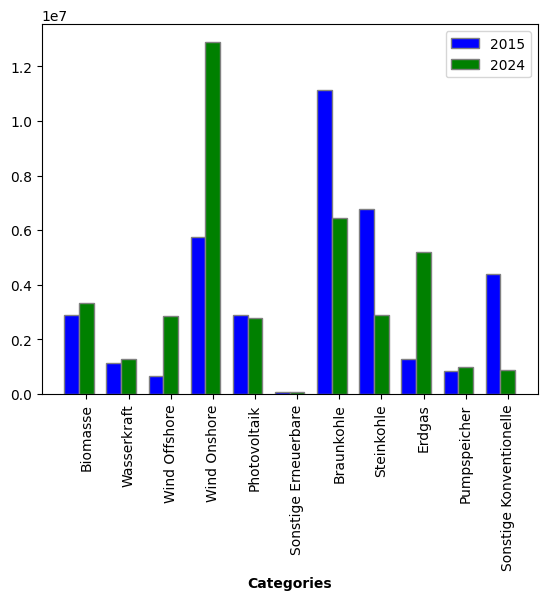

In [162]:
# Extract data for 2015 and 2024
data_2015 = combined_2015_2024[combined_2015_2024['Datum'].dt.year == 2015][categories].mean()
data_2024 = combined_2015_2024[combined_2015_2024['Datum'].dt.year == 2024][categories].mean()

# Create figure and axes
fig, ax = plt.subplots()

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(data_2015))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.bar(r1, data_2015, color='b', width=bar_width, edgecolor='grey', label='2015')
ax.bar(r2, data_2024, color='g', width=bar_width, edgecolor='grey', label='2024') # Changed color to green for 2024

# Adding xticks
plt.xlabel('Categories', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(data_2015))], categories, rotation=90)

plt.legend()
plt.show()


## 3. Installierte Gesamtkapazität 2024
ribbon chart entwicklung 2015 zu 2024 bzgl installierter kapazität

In [159]:
# Load the data
df = pd.read_csv('Data/entsoe/de_NGC_15_24.csv')

df

,MeasureItem,MeasureItemCategoryID,MeasureItemID,Category,Country,Year,Representativity,ProvidedValue,CreationDate,ProvidedValueCode
0,Net Generating Capacity,6,36,Biomass,DE,2015,100.0,"6804,36","13:06,1",NaN
1,Net Generating Capacity,6,160,Fossil_Brown_coal_Lignite,DE,2015,100.0,20929,"13:06,8",NaN
2,Net Generating Capacity,6,161,Fossil_Coal_derived_gas,DE,2015,NaN,NaN,"13:05,3",Not Expected
3,Net Generating Capacity,6,162,Fossil_Gas,DE,2015,100.0,"28325,8","13:06,4",NaN
4,Net Generating Capacity,6,163,Fossil_Hard_coal,DE,2015,100.0,"26479,6","13:07,0",NaN
5,Net Generating Capacity,6,164,Fossil_Oil,DE,2015,100.0,"4280,6","13:06,6",NaN
6,Net Generating Capacity,6,165,Fossil_Oil_shale,DE,2015,NaN,NaN,"13:07,1",Not Expected
7,Net Generating Capacity,6,166,Fossil_Peat,DE,2015,NaN,NaN,"13:06,5",Not Expected
8,Net Generating Capacity,6,81,Geothermal,DE,2015,100.0,"33,44","13:07,6",NaN
9,Net Generating Capacity,6,168,Hydro_Pure_pumped_Storage,DE,2015,100.0,"5281,5","13:07,8",NaN


### 3.1 unterschied installierte vs. realisierte kapazität 2023